# Classificação: Marketing em Investimentos

Neste projeto, iremos analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

# Análise exploratória

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

# <font color = 'orange'> 1. Pré-processamento

# <font color='orange'> Biblioteca </font>

In [31]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# <font color='orange'> Importar dados </font>

In [32]:
dados = pd.read_csv('marketing_investimento.csv')
dados.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [33]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando os dados

Uma etapa muito importante em projetos de machine learning é a exploração e entendimento dos dados, conhecida como **análise exploratória**. Podemos utilizar gráficos para verificar quais são as informações em cada uma das colunas da base de dados, identificar inconsistências e padrões que possam existir.

Vamos explorar cada uma das colunas da base de dados com o uso da biblioteca `plotly`. Vamos começar pelas variáveis categóricas e depois explorar as variáveis numéricas.

### Variáveis categóricas

In [34]:
import plotly.express as px

In [35]:
px.histogram(dados, x = 'aderencia_investimento', text_auto = True)

In [36]:
px.histogram(dados, x = 'estado_civil', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [37]:
px.histogram(dados, x = 'inadimplencia', text_auto = True)

In [38]:
px.histogram(dados, x = 'escolaridade', text_auto = True)

In [39]:
px.histogram(dados, x = 'fez_emprestimo', text_auto = True)

### Variáveis numéricas

In [40]:
px.box(dados, x = 'idade', color = 'aderencia_investimento')

In [41]:
px.box(dados, x = 'saldo', color = 'aderencia_investimento')

In [42]:
px.box(dados, x = 'numero_contatos', color = 'aderencia_investimento')

In [43]:
px.box(dados, x = 'tempo_ult_contato', color = 'aderencia_investimento')

# Tranformação de dados

## Variáveis explicativas e variável alvo

Para fazer a previsão dos valores com um modelo de machine learning, precisamos fazer a separação da variável alvo e variáveis explicativas. O y representa a variável que queremos prever, enquanto x representa todas as variáveis que serão utilizadas para explicar o comportamento de **y**.

In [44]:
x = dados.drop('aderencia_investimento', axis = 1)
y = dados['aderencia_investimento']
y

,aderencia_investimento
0,sim
1,sim
2,nao
3,sim
4,sim
...,...
1263,sim
1264,sim
1265,sim
1266,sim


## Transformando as variáveis explicativas

Os algoritmos de machine learning não compreendem dados no formato de texto, portanto devemos fazer transformações nos dados para o formato numérico para que o algoritmo consiga compreender as informações. Essa transformação precisa ser feita de forma que não altere a informação original do conjunto de dados, portanto não basta simplesmente alterar os valores para valores numéricos aleatórios.

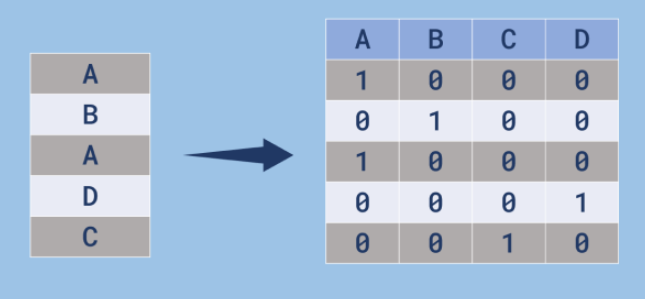

In [45]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [46]:
#Transforma apenas as freatures
one_hot = OneHotEncoder(drop = 'if_binary') # crio objeto que ira converter para 0 a 1
transformer = make_column_transformer((one_hot, ['estado_civil', 'escolaridade', 'inadimplencia','fez_emprestimo']), remainder='passthrough', sparse_threshold=0) # cria modelo para transformar as colunas

In [47]:
transformer.fit_transform(x) #array

array([[ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.420e+02,  5.870e+02,
         1.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  1.289e+03,  2.500e+02,
         4.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  3.630e+02,  1.600e+01,
         1.800e+01],
       ...,
       [ 0.000e+00,  0.000e+00,  1.000e+00, ..., -4.770e+02,  1.532e+03,
         2.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.187e+03,  5.250e+02,
         3.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  1.900e+01,  1.100e+02,
         2.000e+00]])

In [48]:
# Colunas de entrada
transformer.feature_names_in_

array(['idade', 'estado_civil', 'escolaridade', 'inadimplencia', 'saldo',
       'fez_emprestimo', 'tempo_ult_contato', 'numero_contatos'],
      dtype=object)

In [49]:
# Colunas de saída
transformer.get_feature_names_out()

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [50]:
linhas = transformer.fit_transform(x)
colunas = transformer.get_feature_names_out()
x_onehot = pd.DataFrame(linhas, columns = colunas) #freatures x modificados

## Transformando a variável alvo

Assim como as variáveis explicativas, a variável alvo também precisa ser alterada para o formato numérico. Podemos representar uma variável alvo binária como 0 ou 1, onde 0 indica ausência da característica da variável e 1 representa a presença da característica.

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
# 1º Opção
#label = LabelEncoder()
#y = label.fit_transform(y)
#2º Opção
y = LabelEncoder().fit_transform(y)
y

array([1, 1, 0, ..., 1, 1, 1])

In [53]:
y = pd.DataFrame(y, columns = ['aderencia_investimento'])

# Ajustando modelos

## Dividindo os dados entre treino e teste

Para compreender se o modelo está de fato aprendendo com os dados, precisamos fazer uma separação dos dados entre treinamento e teste. Os dados de **treinamento** são usados para ajustar o modelo, enquanto os dados de **teste** servem para verificar o aprendizado do modelo em dados que não foram utilizados no momento do ajuste.

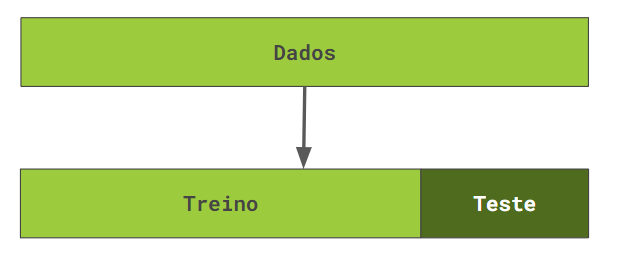

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# Dividindo os dados entre treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_onehot, y, test_size = 0.3, random_state=1)

print('Tamanho de x_treino:', x_treino.shape)
print('Tamanho de x_teste:', x_teste.shape)
print('Tamanho de y_treino:', y_treino.shape)
print('Tamanho de y_teste:', y_teste.shape)

Tamanho de x_treino: (887, 12)
Tamanho de x_teste: (381, 12)
Tamanho de y_treino: (887, 1)
Tamanho de y_teste: (381, 1)


## Modelo de base

O modelo mais simples de classificar os dados é simplesmente utilizar um algoritmo que chuta todas as classificações para a classe que tem maior frequência. Esse algoritmo serve como um critério de comparação, para identificar se os outros modelos tem um desempenho melhor do que a classificação mais simples possível.

In [56]:
from sklearn.dummy import DummyClassifier

In [67]:
# prompt: from sklearn.dummy import DummyClassifier utilizando essa biblioteca, faça um modelo de base para classificar os dados utilizando um algoritmo que chuta todas as classificações para a classe com maior frequência, use esses métodos SVC, K-nearest neighbors(KNN), Naive Bayes, Bernoulli Naive Bayes, com gráficos e resultados mostrado prints do código.

# Modelo de base
modelo_dummy = DummyClassifier(strategy='most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)

# Acurácia do modelo de base
acuracia_dummy = accuracy_score(y_teste, previsao_dummy)
print('Acurácia do modelo de base (Dummy):', acuracia_dummy)


Acurácia do modelo de base (Dummy): 0.6404199475065617


In [68]:
# Outros modelos
# SVC
modelo_svc = LinearSVC()
modelo_svc.fit(x_treino, y_treino.values.ravel())
previsao_svc = modelo_svc.predict(x_teste)
acuracia_svc = accuracy_score(y_teste, previsao_svc)
print('Acurácia do modelo SVC:', acuracia_svc)

Acurácia do modelo SVC: 0.5590551181102362


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



## KNN

O algoritmo KNN se baseia no cálculo de distância entre os registros da base de dados e busca elementos que estejam próximos uns dos outros (vizinhos) para tomar a decisão da classificação.

Por conta de usar cálculos de distância, esse algoritmo é influenciado pela escala das variáveis e por conta disso é necessário uma transformação nos dados antes de utilizar esse método.

In [59]:
# KNN
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(x_treino, y_treino.values.ravel())
previsao_knn = modelo_knn.predict(x_teste)
acuracia_knn = accuracy_score(y_teste, previsao_knn)
print('Acurácia do modelo KNN:', acuracia_knn)

Acurácia do modelo KNN: 0.7427821522309711


In [60]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
modelo_nb = GaussianNB()
modelo_nb.fit(x_treino, y_treino.values.ravel())
previsao_nb = modelo_nb.predict(x_teste)
acuracia_nb = accuracy_score(y_teste, previsao_nb)
print('Acurácia do modelo Naive Bayes:', acuracia_nb)

Acurácia do modelo Naive Bayes: 0.6929133858267716


In [61]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
modelo_bnb = BernoulliNB()
modelo_bnb.fit(x_treino, y_treino.values.ravel())
previsao_bnb = modelo_bnb.predict(x_teste)
acuracia_bnb = accuracy_score(y_teste, previsao_bnb)
print('Acurácia do modelo Bernoulli Naive Bayes:', acuracia_bnb)

Acurácia do modelo Bernoulli Naive Bayes: 0.6141732283464567


O Modelo que obteve o desempenho melhor em comparação aos outros modelos de classificação foi o método baseado K-nearest neighbors (KNN).

## Árvore de decisão

O modelo de árvore de decisão é muito utilizado pela sua alta **explicabilidade** e **processamento rápido**, mantendo um desempenho bem interessante.

Ele se baseia em decisões simples tomadas pelo algoritmo, separando os dados com base em comparações de **menor** e **maior** nos valores das colunas da base de dados.

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

```
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']
```

Acurácia do modelo de árvore de decisão: 0.7244094488188977


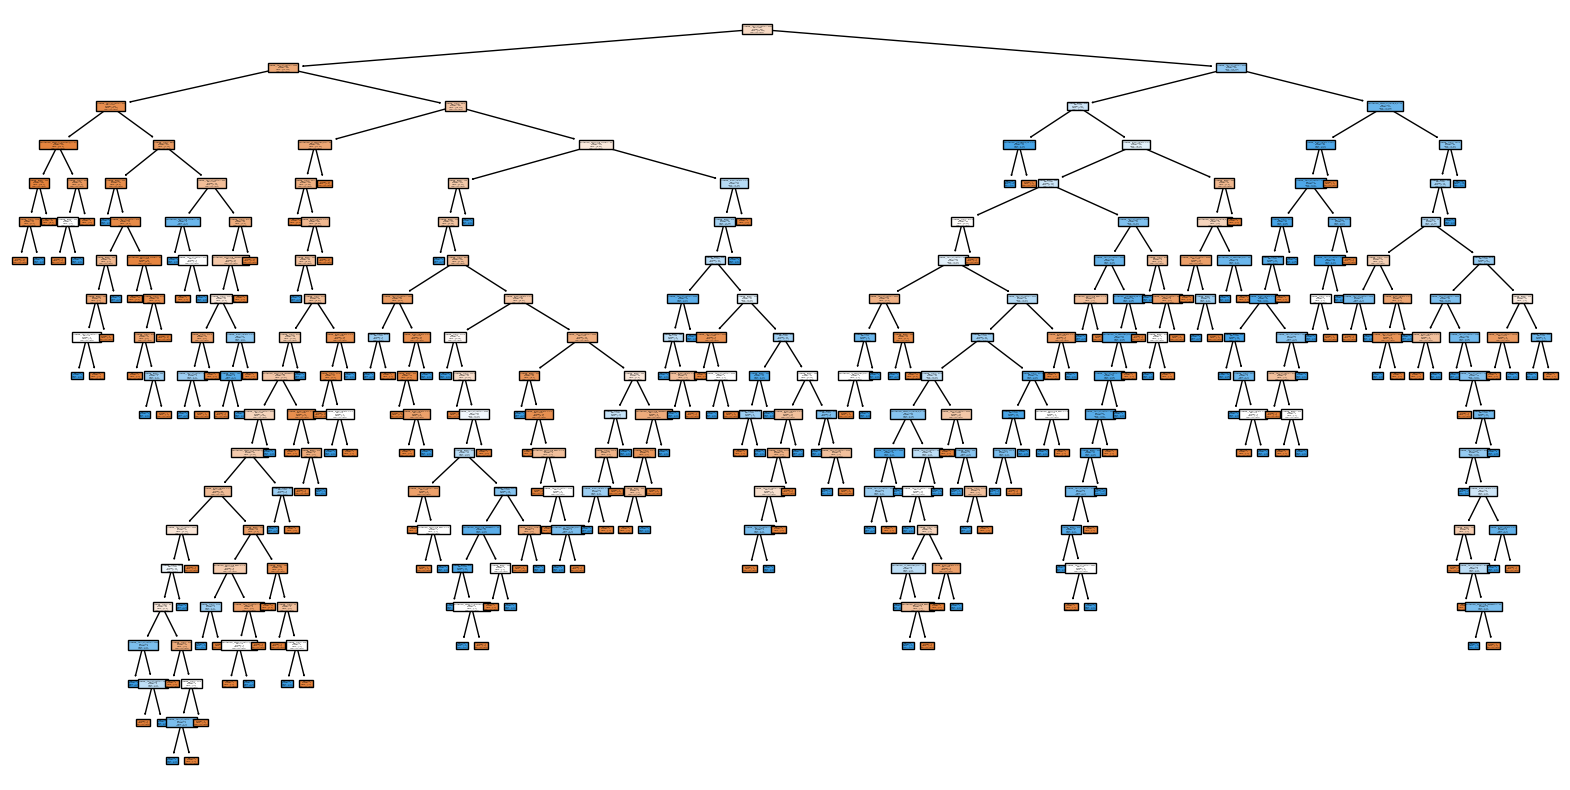

In [71]:
# prompt: from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt
# Utilizando essas bibliotecas, faça um modelo de árvore de decisão em python, onde é muito utilizado pela sua alta explicabilidade e processamento rápido, mantendo um desempenho bem interessante.
# Adicione o esquematico da arvore

import matplotlib.pyplot as plt
# Cria o modelo de árvore de decisão
modelo_arvore = DecisionTreeClassifier(random_state=1)

# Ajusta o modelo aos dados de treino
modelo_arvore.fit(x_treino, y_treino)

# Faz previsões nos dados de teste
previsao_arvore = modelo_arvore.predict(x_teste)

# Calcula a acurácia do modelo
acuracia_arvore = accuracy_score(y_teste, previsao_arvore)
print('Acurácia do modelo de árvore de decisão:', acuracia_arvore)

# Plota a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(modelo_arvore, filled=True, feature_names=x_onehot.columns, class_names=['Não Aderiu', 'Aderiu'])
plt.show()


# Seleção de modelos

## Normalizando os dados

Alguns algoritmos podem atribuir um peso maior aos valores das variáveis devido a escala dos valores e não pela importância da classificação da variável alvo. Por exemplo, em uma base de dados com a colunas **idade** e **salário**, o algoritmo pode dar um peso de decisão maior para os valores do salário simplesmente por estar em uma escala maior do que os valores de idade, e não porque a variável salário é mais importante do que a variável idade.

Nesses casos, precisamos fazer uma transformação nos dados para que fiquem em uma mesma escala, fazendo com que o algoritmo não seja influenciado incorretamente pelos valores numéricos divergentes entre as variáveis.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
# prompt: Faça a normalizando dos dados, utilizando essa biblioteca from sklearn.preprocessing import MinMaxScaler, considerando essa formula: X_SC = (X - X_min)/(X_max - X_min)

import pandas as pd
# Cria o objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajusta o scaler aos dados de treino
scaler.fit(x_treino)

# Transforma os dados de treino e teste
x_treino_scaled = scaler.transform(x_treino)
x_teste_scaled = scaler.transform(x_teste)

# Converte os dados normalizados para DataFrames
x_treino_scaled = pd.DataFrame(x_treino_scaled, columns=x_treino.columns)
x_teste_scaled = pd.DataFrame(x_teste_scaled, columns=x_teste.columns)


In [76]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cria o objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajusta o scaler aos dados de treino
scaler.fit(x_treino)

# Transforma os dados de treino e teste
X_train_scaled = scaler.transform(x_treino)
X_test_scaled = scaler.transform(x_teste)

# Converte os dados normalizados para DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=x_treino.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=x_teste.columns)

# Calcula manualmente a normalização usando a fórmula X_SC = (X - X_min)/(X_max - X_min)
X_min = x_treino.min()
X_max = x_treino.max()

# Aplica a fórmula aos dados de treino
X_train_manual_scaled = (x_treino - X_min) / (X_max - X_min)

# Compara os resultados
print("Resultado da normalização com MinMaxScaler:")
print(X_train_scaled.head())

print("\nResultado da normalização calculado manualmente:")
print(X_train_manual_scaled.head())


Resultado da normalização com MinMaxScaler:
   onehotencoder__estado_civil_casado (a)  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   onehotencoder__estado_civil_divorciado (a)  \
0                                         0.0   
1                                         1.0   
2                                         0.0   
3                                         1.0   
4                                         1.0   

   onehotencoder__estado_civil_solteiro (a)  \
0                                       1.0   
1                                       0.0   
2                                       1.0   
3                                       0.0   
4                                       0.0   

   onehotencoder__escolaridade_fundamental  onehotencoder__escolaridade_medio  \
0                         

## Escolhendo e salvando o melhor modelo

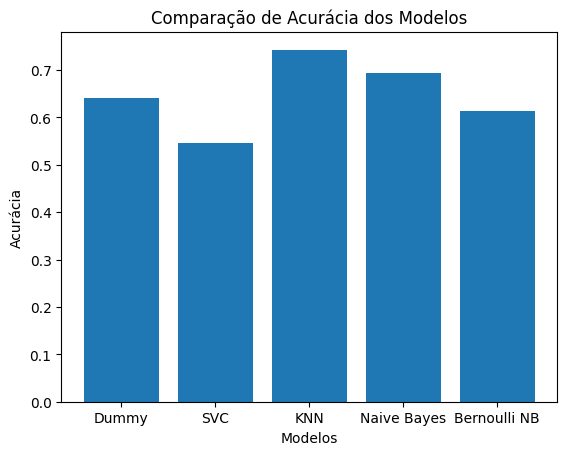

In [62]:
# Gráficos
import matplotlib.pyplot as plt
modelos = ['Dummy', 'SVC', 'KNN', 'Naive Bayes', 'Bernoulli NB']
acuracias = [acuracia_dummy, acuracia_svc, acuracia_knn, acuracia_nb, acuracia_bnb]

plt.bar(modelos, acuracias)
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia dos Modelos')
plt.show()

Ao final de um projeto de machine learning, devemos comparar os resultados dos modelos e escolher aquele que tenha o melhor desempenho.


## Pickle Dump


Podemos armazenar o modelo em um arquivo serializado do tipo pickle para que seja utilizado em produção, ou seja, em dados do mundo real para atender as necessidades do problema que precisa ser resolvido.

Acurácia do modelo KNN carregado: 0.6404199475065617


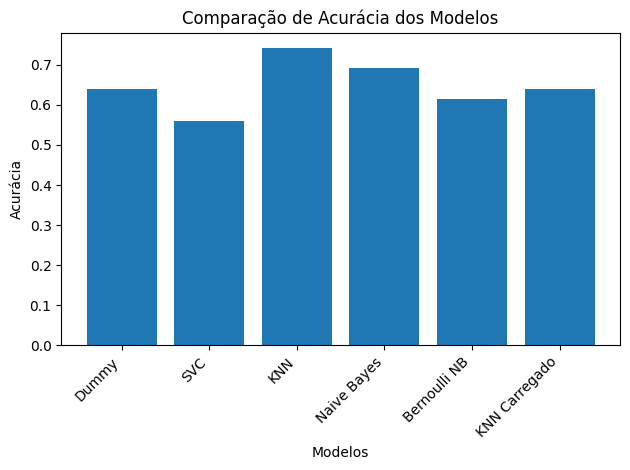

In [78]:
# prompt: faça um código de Pickle Dum, podemos armazenar o modelo em um arquivo serializado do tipo pickle para que seja utilizado em produção, ou seja, em dados do mundo real para atender as necessidades do problema que precisa ser resolvido, faça um print do resultado e gráficos

import matplotlib.pyplot as plt
import pickle

# Salvando o modelo KNN em um arquivo pickle
with open('modelo_knn.pkl', 'wb') as arquivo:
  pickle.dump(modelo_knn, arquivo)

# Carregando o modelo KNN do arquivo pickle
with open('modelo_knn.pkl', 'rb') as arquivo:
  modelo_knn_carregado = pickle.load(arquivo)

# Fazendo previsões com o modelo carregado
previsoes_carregadas = modelo_knn_carregado.predict(x_teste_scaled)

# Avaliando a acurácia do modelo carregado
acuracia_carregada = accuracy_score(y_teste, previsoes_carregadas)
print('Acurácia do modelo KNN carregado:', acuracia_carregada)

# Gráficos
modelos = ['Dummy', 'SVC', 'KNN', 'Naive Bayes', 'Bernoulli NB', 'KNN Carregado']
acuracias = [acuracia_dummy, acuracia_svc, acuracia_knn, acuracia_nb, acuracia_bnb, acuracia_carregada]

plt.bar(modelos, acuracias)
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia dos Modelos')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()
